In [1]:
import json
import os
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt
import base64
import io
import pyperclip

In [2]:
DATASET_PATH = "../Dataset"
ANNOTATION_PATH = "../Dataset/annotation.json"

with open(ANNOTATION_PATH, 'r') as f:
    df = json.load(f)

print(len(df))
print(os.listdir(DATASET_PATH))

273
['annotation.json', '.DS_Store', 'UrbanFlowComplexity', 'SafetyCompliance', 'PerceptionReasoning']


In [4]:
id_list = []
image_path_list = []
question_list = []
explanation_list = []
answer_list = []

for data in df:
    id_list.append(data.split(".")[0])
    image_path_list.append(os.path.join(DATASET_PATH, df[data]['path']))
    question_list.append(df[data]['question'])
    explanation_list.append(df[data]['answers'])
    answer_list.append({
        'A': df[data]['answers'],
        'B': df[data]['distractor1'],
        'C': df[data]['distractor2'],
        'D': df[data]['distractor3'],
        })
    break

print(id_list[0])
print(image_path_list[0])
print(question_list[0])
print(explanation_list[0])
print(answer_list[0])

EMP01
../Dataset/UrbanFlowComplexity/EvasiveManeuverPlanning/EMP01.png
In this complex traffic scenario, what immediate hazard or condition should the autonomous vehicle prioritize in its evasive maneuver planning?
The potential for unpredictable movements from the blurry motorcycle.
{'A': 'The potential for unpredictable movements from the blurry motorcycle.', 'B': 'The stationary vehicles parked on the side of the road.', 'C': 'The need to maintain a high speed to keep up with the flow of traffic.', 'D': 'The clear and open lane to the far left as a potential escape route.'}


In [5]:
df_columns=['index','id','image', 'question', 'A', 'B', 'C', 'D', 'answer', 'explanation']
option_labels = ['A', 'B', 'C', 'D']
pd.DataFrame(columns=df_columns)

,index,id,image,question,A,B,C,D,answer,explanation


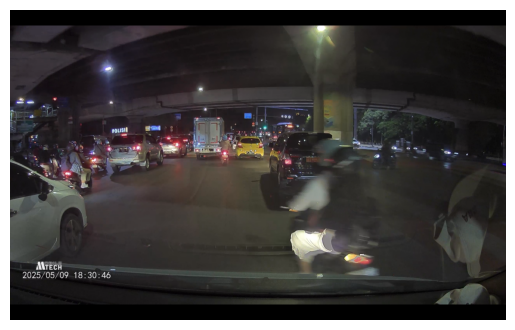

In [6]:
def encode_base64(im_path):
    # Determine the image format (optional but good practice)
    # You can hardcode this if you know the format, e.g., format="PNG"
    img_format = im_path.split('.')[-1].upper()
    if img_format == 'JPG':
        img_format = 'JPEG'

    try:
        # 1. Open the image
        image = Image.open(im_path)

        # 2. Create a byte buffer
        buffered = io.BytesIO()

        # 3. Save the image to the buffer in its original format
        image.save(buffered, format=img_format)

        # 4. Get the byte value and encode it
        img_byte = buffered.getvalue()
        base64_encoded_string = base64.b64encode(img_byte)

        # 5. Decode the bytes to a UTF-8 string
        base64_string = base64_encoded_string.decode('utf-8')

        return base64_string

    except FileNotFoundError:
        print(f"Error: The file at {im_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

def showImage(im):
    try:
        # 1. Decode the Base64 string into bytes
        image_bytes = base64.b64decode(im)

        # 2. Use io.BytesIO to read the bytes as a file
        image_buffer = io.BytesIO(image_bytes)

        # 3. Open the image with Pillow and display with Matplotlib
        image = Image.open(image_buffer)
        
        plt.imshow(image)
        plt.axis('off')  # Hide the axes
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

im = encode_base64(image_path_list[0])
showImage(im)
pyperclip.copy(im)

In [7]:
processed_data = []

# Iterate over each item in your original data
for i, data in enumerate(df.items()):
    data_key, values = data
    # 1. Store the original correct answer text
    correct_answer_text = values['answers']

    # 2. Collect all options into a list
    all_options = [
        values['answers'],
        values['distractor1'],
        values['distractor2'],
        values['distractor3']
    ]

    # 3. Shuffle the options randomly
    random.shuffle(all_options)

    # 4. Find the new position (0, 1, 2, or 3) of the correct answer
    correct_option_index = all_options.index(correct_answer_text)

    # 5. Get the corresponding label ('A', 'B', 'C', or 'D') for the correct answer
    correct_option_label = option_labels[correct_option_index]

    # 6. Build a dictionary for the current row
    row_data = {
        'index':i,
        'id': data_key.split('.')[0],
        'image': encode_base64(os.path.join(DATASET_PATH, values['path'])),
        'question': values['question'],
        'A': all_options[0],
        'B': all_options[1],
        'C': all_options[2],
        'D': all_options[3],
        'answer': correct_option_label, # The randomized label ('A', 'B', 'C', or 'D')
        'explanation': correct_answer_text # The original, unchanging answer text
    }
    processed_data.append(row_data)

# Create the DataFrame from the list of processed row data
final_df = pd.DataFrame(processed_data, columns=df_columns)

# Save the DataFrame to an Excel file, without the pandas index
output_filename = '../Dataset/annotation.csv'
final_df.to_csv(output_filename, index=False)

print(f"Successfully created '{output_filename}'")
print("\nFirst 5 rows of the new DataFrame:")
final_df.head()


Successfully created '../Dataset/annotation.csv'

First 5 rows of the new DataFrame:


,index,id,image,question,A,B,C,D,answer,explanation
0,0,EMP01,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"In this complex traffic scenario, what immedia...",The clear and open lane to the far left as a p...,The stationary vehicles parked on the side of ...,The potential for unpredictable movements from...,The need to maintain a high speed to keep up w...,C,The potential for unpredictable movements from...
1,1,EMP02,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"Considering the overall traffic environment, w...",The high speed of the surrounding traffic.,Limited available space due to numerous surrou...,Difficulty in identifying the destination of t...,Poor visibility due to the glare from streetli...,B,Limited available space due to numerous surrou...
2,2,EMP03,iVBORw0KGgoAAAANSUhEUgAAB38AAAP2CAYAAADn0VcdAA...,"As an autonomous driving agent, what is the mo...",Attempt to drive around the obstacle on the ri...,Reverse and find an alternative route.,Wait for the obstacle to clear while turning o...,Honk to signal the obstacle to move.,C,Wait for the obstacle to clear while turning o...
3,3,EMP04,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"Analyzing the depicted environment, what is th...",There's nothing to look out for.,A pedestrian suddenly crossing the road from t...,The car in front is preparing to accelerate qu...,"A sudden brake from the car in front, indicate...",D,"A sudden brake from the car in front, indicate..."
4,4,EMP05,iVBORw0KGgoAAAANSUhEUgAABrIAAANvCAYAAACRd0pHAA...,"As an autonomous driving agent, what is the mo...",Quickly swerve to the right to bypass the vehi...,Pull over to ther left and wait until the vehi...,Stop abruptly and wait for the vehicle behind ...,Honk the horn and proceed forward to assert ri...,B,Pull over to ther left and wait until the vehi...


In [8]:
output_filename = '/Users/rx0/Desktop/Thesis/Experiment/JktDriveVLM/Dataset/annotation.csv'
test_df = pd.read_csv(output_filename)

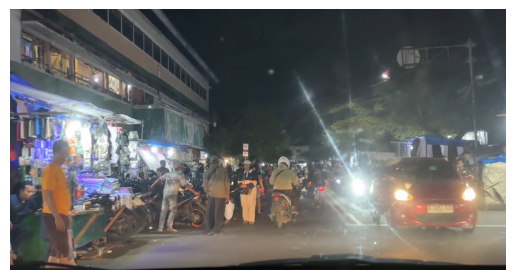

In [9]:
im = test_df.sample(1)['image'].item()
showImage(im)
pyperclip.copy(test_df.sample(1)['image'].item())

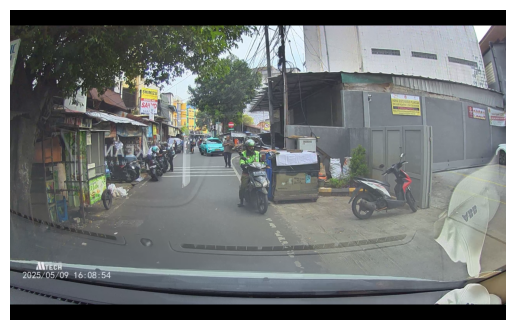

In [10]:
im = test_df.sample(1)['image'].item()
showImage(im)

In [11]:
sample_df = test_df.sample(2)
sample_df.to_csv('sample_output.tsv', sep='\t', index=False)

In [12]:
tsv_output = '../Dataset/jktdrive.tsv'
test_df.to_csv(tsv_output, sep='\t', index=False)

In [13]:
tsv_df = pd.read_csv(tsv_output, sep='\t')
tsv_df.head()

,index,id,image,question,A,B,C,D,answer,explanation
0,0,EMP01,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"In this complex traffic scenario, what immedia...",The clear and open lane to the far left as a p...,The stationary vehicles parked on the side of ...,The potential for unpredictable movements from...,The need to maintain a high speed to keep up w...,C,The potential for unpredictable movements from...
1,1,EMP02,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"Considering the overall traffic environment, w...",The high speed of the surrounding traffic.,Limited available space due to numerous surrou...,Difficulty in identifying the destination of t...,Poor visibility due to the glare from streetli...,B,Limited available space due to numerous surrou...
2,2,EMP03,iVBORw0KGgoAAAANSUhEUgAAB38AAAP2CAYAAADn0VcdAA...,"As an autonomous driving agent, what is the mo...",Attempt to drive around the obstacle on the ri...,Reverse and find an alternative route.,Wait for the obstacle to clear while turning o...,Honk to signal the obstacle to move.,C,Wait for the obstacle to clear while turning o...
3,3,EMP04,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"Analyzing the depicted environment, what is th...",There's nothing to look out for.,A pedestrian suddenly crossing the road from t...,The car in front is preparing to accelerate qu...,"A sudden brake from the car in front, indicate...",D,"A sudden brake from the car in front, indicate..."
4,4,EMP05,iVBORw0KGgoAAAANSUhEUgAABrIAAANvCAYAAACRd0pHAA...,"As an autonomous driving agent, what is the mo...",Quickly swerve to the right to bypass the vehi...,Pull over to ther left and wait until the vehi...,Stop abruptly and wait for the vehicle behind ...,Honk the horn and proceed forward to assert ri...,B,Pull over to ther left and wait until the vehi...
